<a href="https://colab.research.google.com/github/Ishansingh438/Bike-Sharing-Demand-Prediction-/blob/main/Ishan_Singh_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [228]:
# Importing required libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

%matplotlib inline

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
from pandas.io.parsers.readers import read_csv
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike sharing ML project/SeoulBikeData.csv' , encoding ='unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [145]:
df.shape

(8760, 14)

In [146]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [147]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [150]:
# Statistical description of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [151]:
# Count of missing values in each column.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [152]:
# Checking Duplicate Values
duplicates =len(df[df.duplicated()])
print(duplicates)

0


In [153]:
# Converting the "date" column into 3 different columns i.e "year","month","day"

df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['day'] = df['date'].dt.day_name()

In [154]:
# Creating a new column of "weekdays_weekend"

df['week']=df['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [155]:
# Number of years
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [156]:
# Dropping the column "Date","day","year"
df=df.drop(columns=['date','day','year'],axis=1)

In [157]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday


In [158]:
# Changing the int64 column into catagory column
cols=['Hour','month','week']
for col in cols:
  df[col]=df[col].astype('category')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

# Heatmap

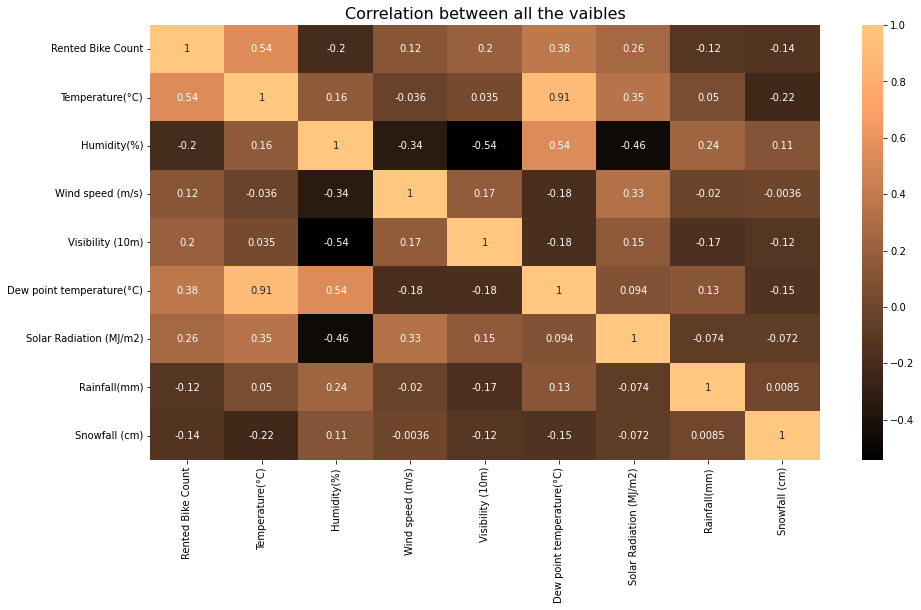

In [160]:
# Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='copper')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

### From heatmap we can see that Temperature and Dew point temperature has the high correlation. So, we drop this column.

In [161]:
df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

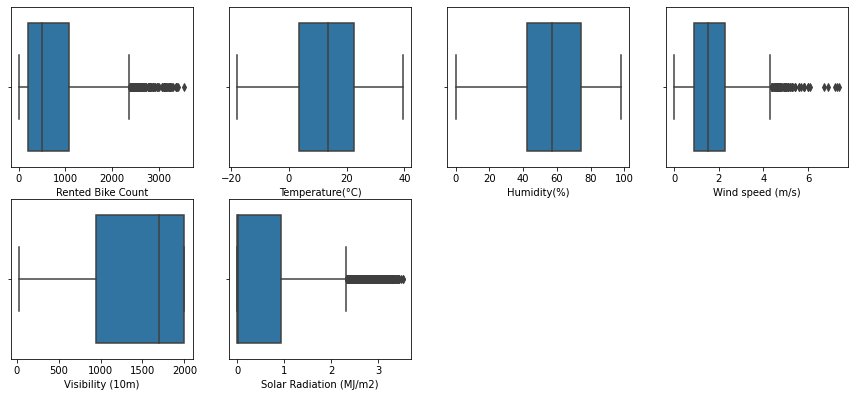

In [162]:
# looking for outliers using box plot

plt.figure(figsize=(15,10))
for x,item in enumerate([i for i in df.describe().columns.to_list() if i not in ['Rainfall(mm)','Snowfall (cm)']]):
  plt.subplot(3,4,x+1)
  sns.boxplot(df[item])

In [163]:
# Finding the inter-quartile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count           874.25
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
dtype: float64


In [164]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [165]:
# Removing outliers
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          7078 non-null   float64 
 4   Humidity(%)              7078 non-null   float64 
 5   Wind speed (m/s)         7078 non-null   float64 
 6   Visibility (10m)         7078 non-null   float64 
 7   Solar Radiation (MJ/m2)  7078 non-null   float64 
 8   Rainfall(mm)             7078 non-null   float64 
 9   Snowfall (cm)            7078 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

In [167]:
# Filling null values with mean values

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

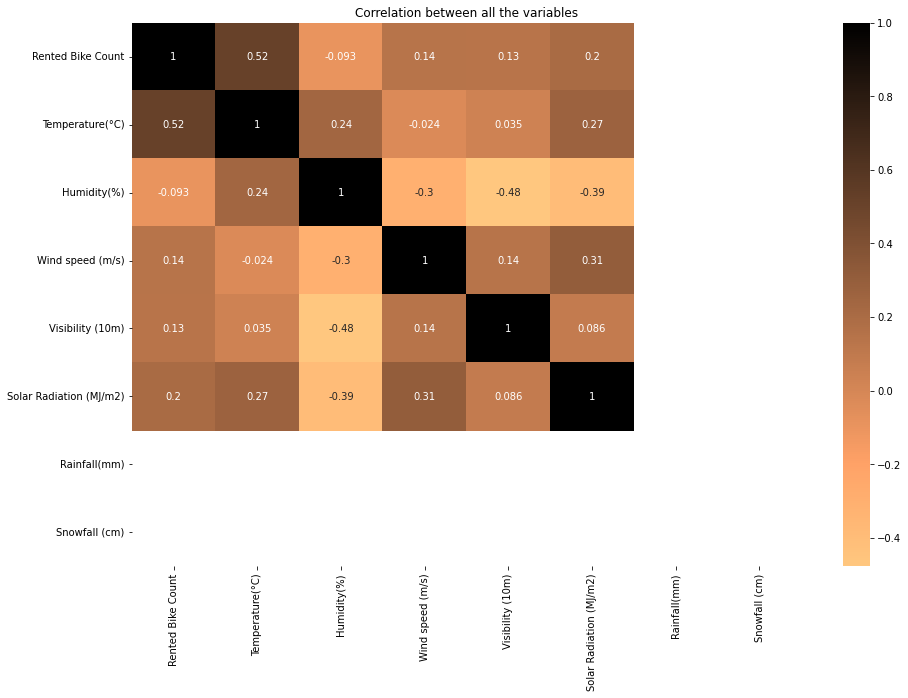

In [168]:
# Heatmap for co-relation in features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='copper_r')
plt.title('Correlation between all the variables')
plt.show()

# Exploratory Data Analysis

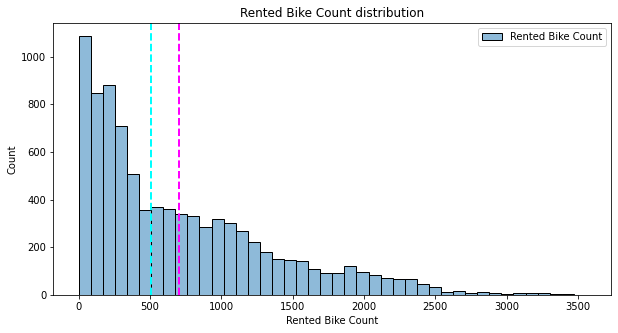

In [169]:
# Checking for skewness of dependent variable 
dependent_variable = ['Rented Bike Count']

plt.figure(figsize=(10,5))
sns.histplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


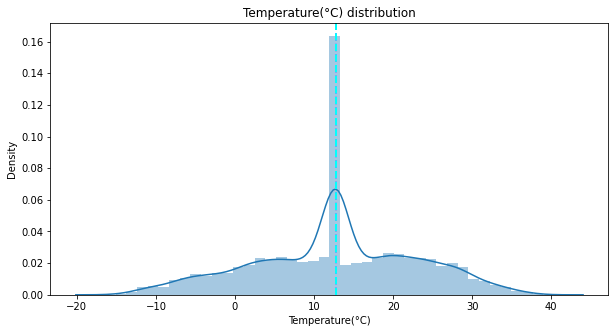

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


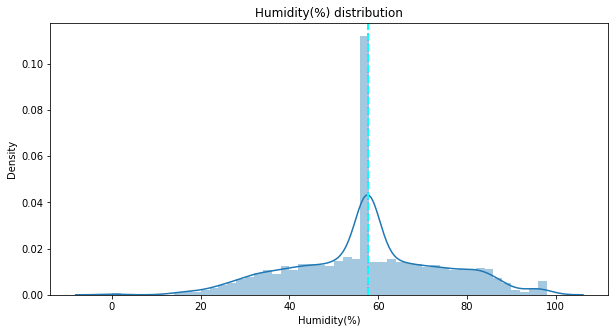

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


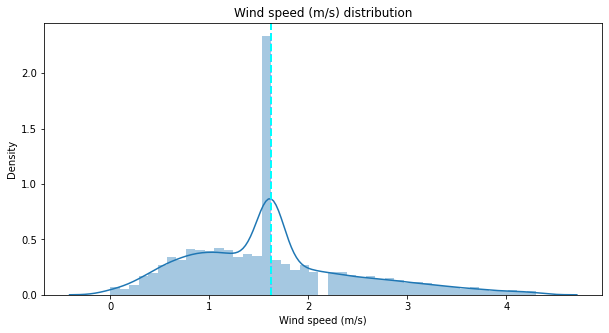

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


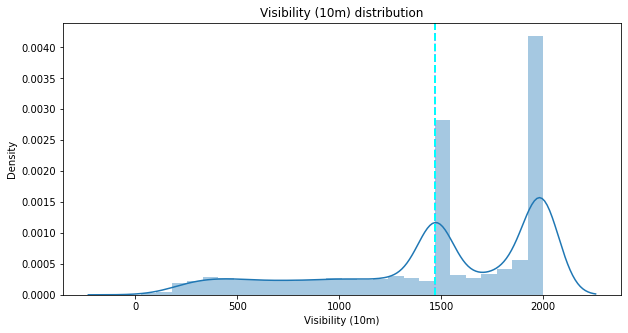

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


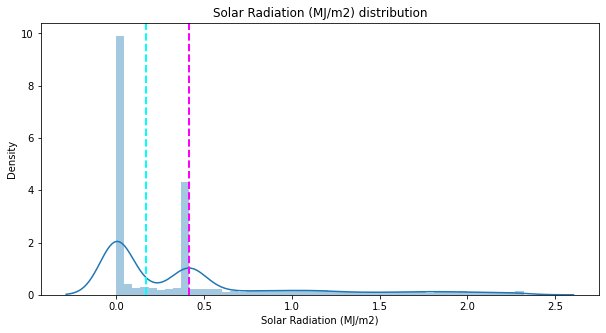

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


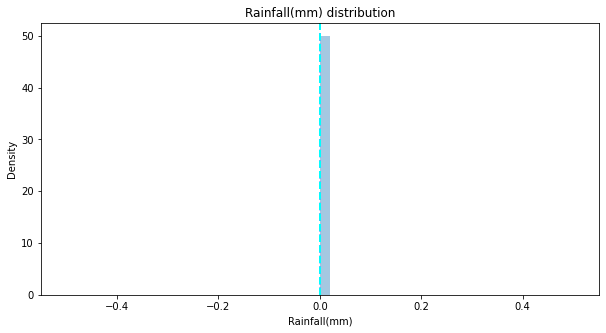

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


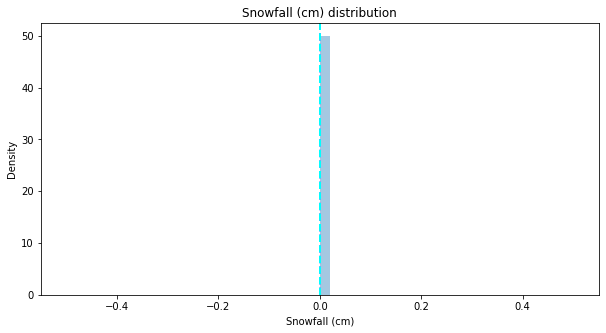

In [170]:
continuous_var = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

## Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

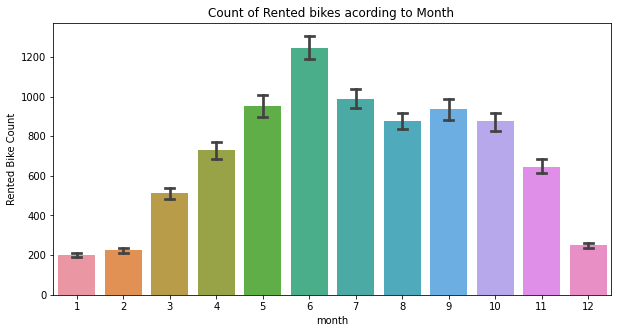

In [171]:
# Visualization of month vs rented bike count
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

## Week

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

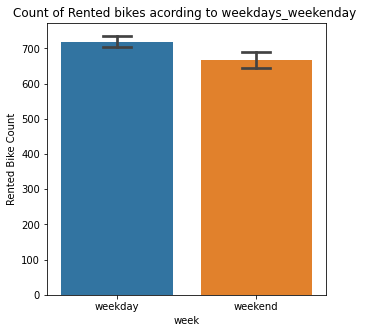

In [172]:
# Vizualisation of week vs rented bike count
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='week',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays & weekend ')]

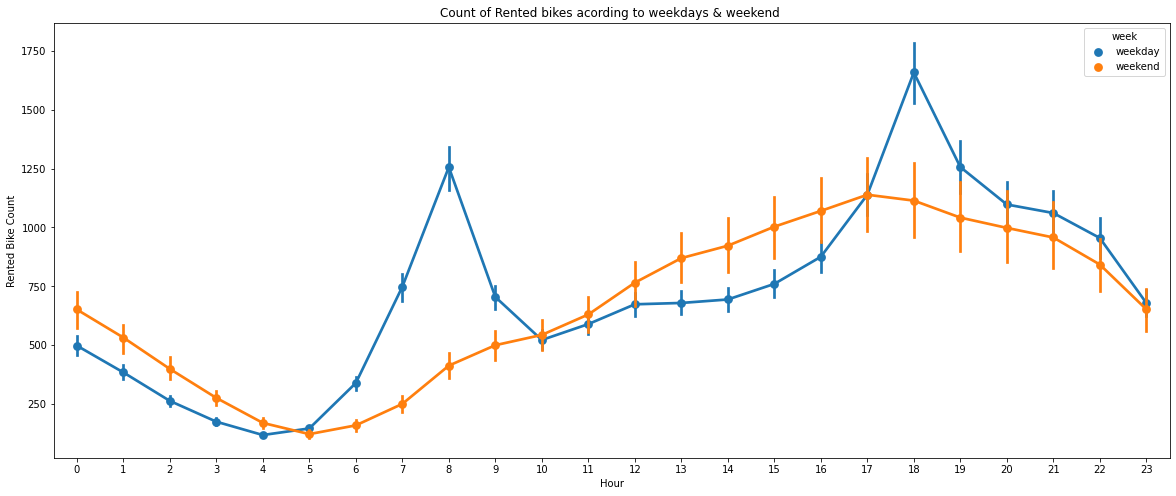

In [173]:
# Vizualisation of hour vs bike rented count
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='week',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays & weekend ')

## Functioning days

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

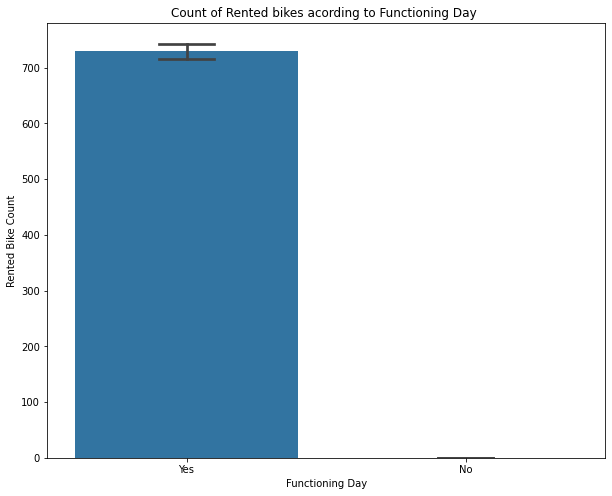

In [174]:
# vizualisation of functioning day vs bike rented count
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

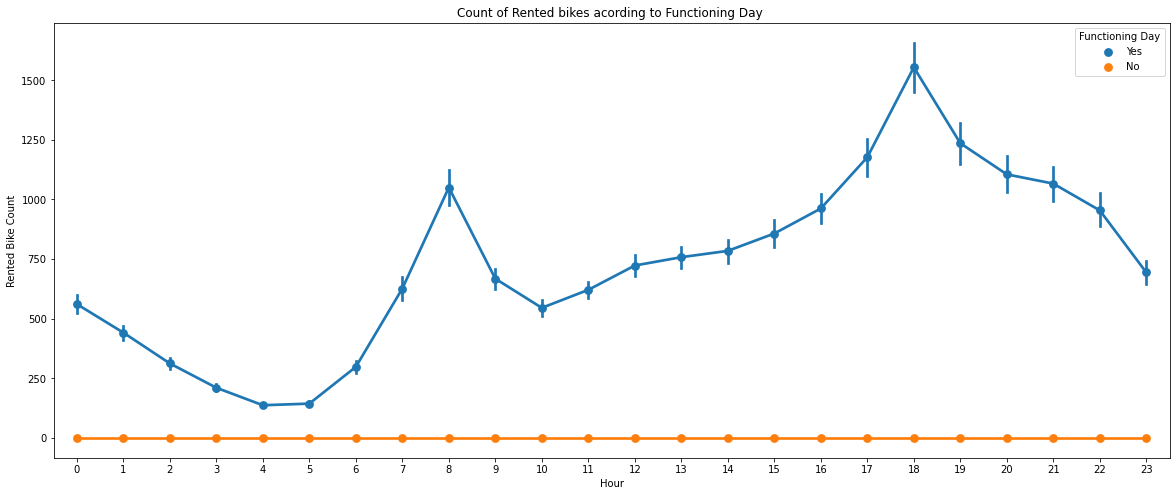

In [175]:
# vizualisation of functioning day vs bike rented count
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

## Season

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

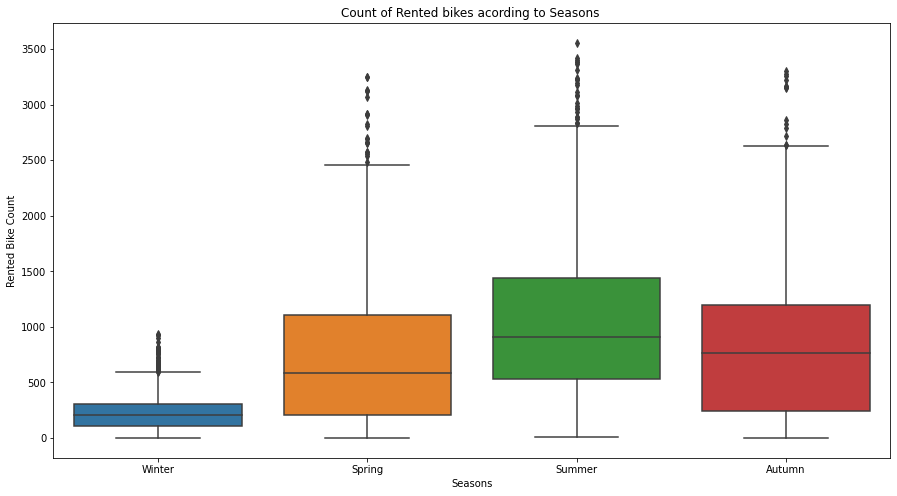

In [176]:
# Visualization of seasons vs bike rented count
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

## Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

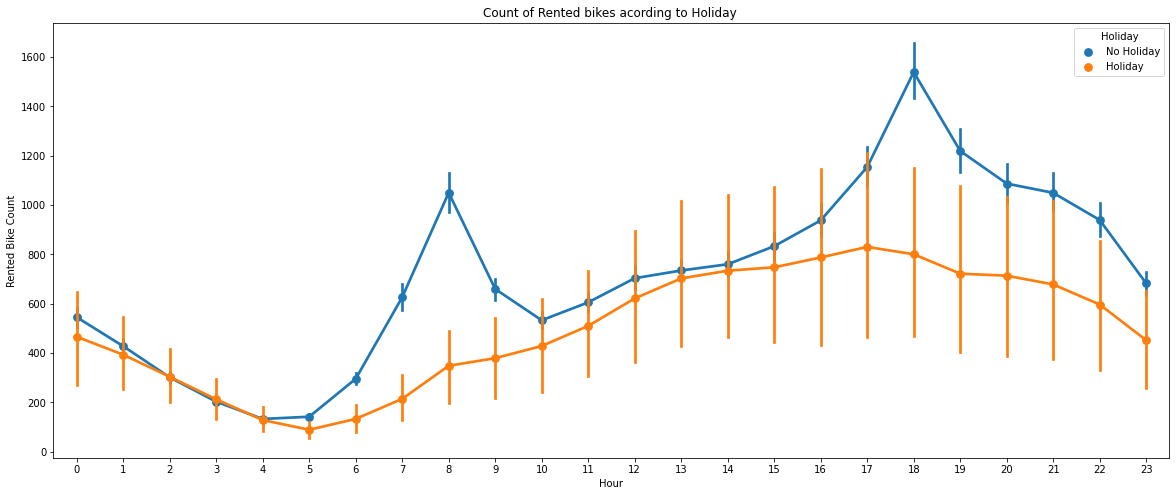

In [177]:
# Vizualisation of hour vs bike rented count
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


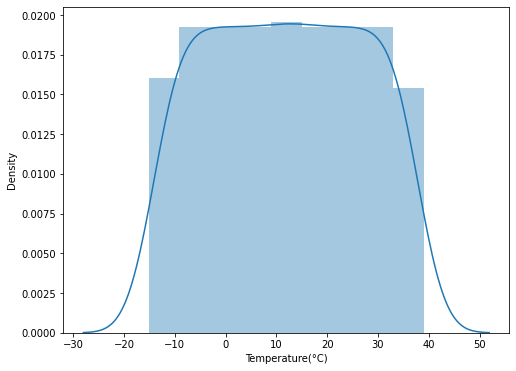

In [178]:
# Creating a dataframe that contains the count of bikes rented in different temperature

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

# Plot shows the distribution of bike rented according to intensity of temperature
plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature(°C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


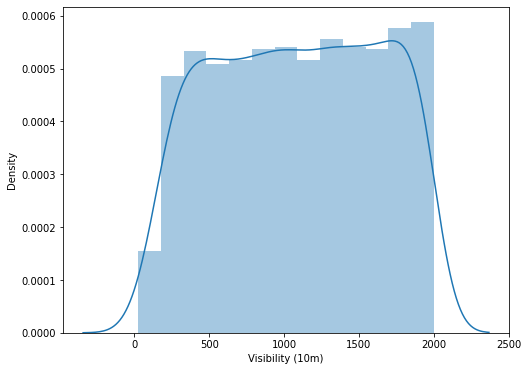

In [179]:
# Creating a dataframe that contains the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

# Plot shows the distribution of bike rented in different visibility ranges
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])

In [180]:
# Creating dummy variables for categorical feature (Seasons, month, DayOfWeek, year, fuctioning day, holiday)

seasons = pd.get_dummies(df['Seasons'])
working_day = pd.get_dummies(df['Holiday'])
F_day = pd.get_dummies(df['Functioning Day'])
month = pd.get_dummies(df['month'])
week_day = pd.get_dummies(df['week'])

df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)

In [181]:
# Dropping columns for which dummy variables were created
df.drop(['Seasons','Holiday','Functioning Day','week','month'],axis=1,inplace=True)

In [182]:
df.drop(['Date'],axis=1,inplace=True)

## Multicollinearty

In [186]:
# Checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                    feature   VIF
0         Rented Bike Count  2.22
1                      Hour  1.41
2           Temperature(°C)  3.97
3               Humidity(%)  2.33
4          Wind speed (m/s)  1.29
5          Visibility (10m)  1.75
6   Solar Radiation (MJ/m2)  1.62
7              Rainfall(mm)   NaN
8             Snowfall (cm)   NaN
9                    Autumn   inf
10                   Spring   inf
11                   Summer   inf
12                   Winter   inf
13               No Holiday  1.05
14                       No   inf
15                      Yes   inf
16                        1   inf
17                        2   inf
18                        3   inf
19                        4   inf
20                        5   inf
21                        6   inf
22                        7   inf
23                        8   inf
24                        9   inf
25                       10   inf
26                       11   inf
27                       12   inf
28            

In [187]:
df=df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

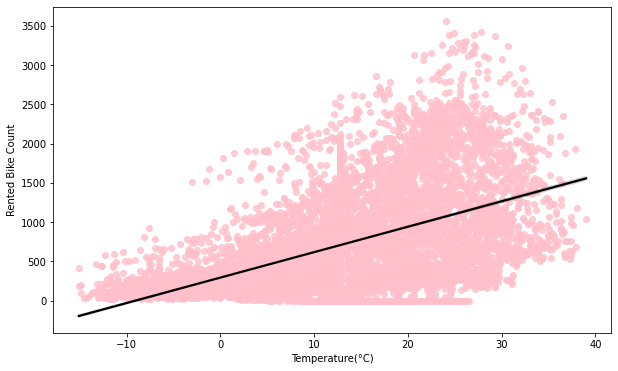

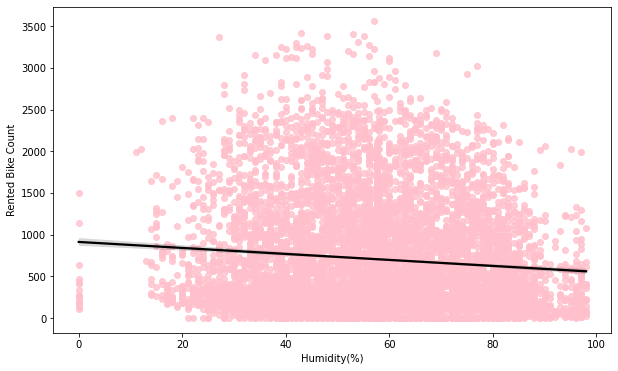

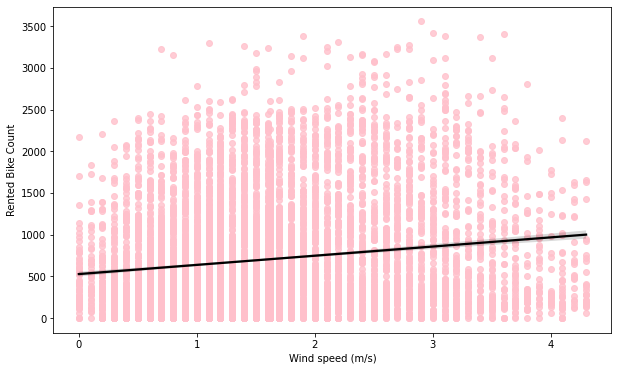

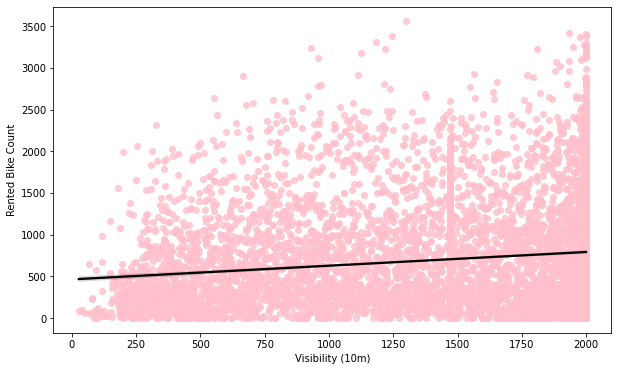

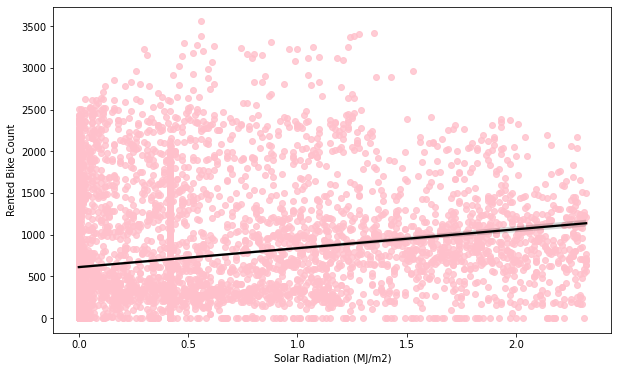

In [200]:
# Regression plot for all numerical features
numerical_columns=['Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)']

for col in numerical_columns:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'pink'}, line_kws={"color": "black"})

In [202]:
# Assign the value in X and Y
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [203]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Autumn,Spring,Summer,Winter,...,5,6,7,8,9,10,11,12,weekday,weekend
0,0,-5.2,37.0,2.2,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,-5.5,38.0,0.8,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2,-6.0,39.0,1.0,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,3,-6.2,40.0,0.9,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,4,-6.0,36.0,2.3,2000.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [204]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [206]:
# Spliting data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 27)
(2190, 27)


In [207]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Linear regression model

In [235]:
reg= LinearRegression().fit(X_train, y_train)

# Checking score
reg.score(X_train, y_train)

0.6030111076694047

In [212]:
# Check the coefficeint
reg.coef_

array([ 3.75003221e+00,  4.07962345e+00, -2.07879394e+00,  3.79677535e-01,
       -7.97208343e-02, -1.47273584e-01, -2.80663822e+13,  1.70714552e+13,
       -1.85708860e+12,  6.13735841e+12,  6.95521247e-01, -1.43286564e+13,
       -1.43286564e+13, -1.98188847e+11, -1.87511556e+11, -7.16970901e+12,
       -7.12841259e+12, -7.18144504e+12,  4.85630353e+12,  4.94666214e+12,
        4.93041008e+12,  2.13284737e+13,  2.18150688e+13,  2.18327916e+13,
       -1.96600055e+11, -9.21889586e+12, -9.21889586e+12])

In [213]:
# X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [214]:
y_pred_test

array([ 1.86572387e+11, -2.84534894e+12,  9.60839087e+10, ...,
       -4.11052586e+11,  4.85731018e+12, -1.72901634e+11])

In [220]:
# Calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# Calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# Calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

# Calculating r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 61.132589005575994
RMSE : 7.818733209771004
MAE : 5.911752830176522
R2 : 0.6030111076694047
Adjusted R2 : 0.5980533370436295


# L2 regularization

In [222]:
ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [233]:
# Checking score
ridge.score(X_train, y_train)

0.6030365859024547

In [225]:
# X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [226]:
# Calculating MSE
MSE  = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :" , MSE)

# Calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

# Calculating r2 and adjusted r2
r2_ridge_test = r2_score(y_test,y_pred_test_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.83384712272395
RMSE : 7.799605574817482
R2 : 0.6148937632653055
Adjusted R2 :  0.6100843884309686


# Elastic-net regression

In [230]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [232]:
# Checking score
elasticnet.score(X_train, y_train)

0.6014721692250583

In [236]:
# X_train and X_test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [237]:
# Calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# Calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# Calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)

# Calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61.369571181250464
RMSE : 7.8338733191985215
MAE : 5.93382066577593
R2 : 0.6014721692250583
Adjusted R2 : 0.5964951796640392


# Decision Tree